# What are the most demanded skills for the top 3 most popular data roles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
import seaborn as sns

In [35]:
us_jobs = df[df['job_country']=='United States'].copy()

In [5]:
df_US = df[df['job_country']=='United States'].copy()
df_US = df_US.explode('job_skills')
df_US[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,NaN
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [6]:
df_skill_count = df_US.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name='skill_count')

In [8]:
df_skill_count.sort_values('skill_count', ascending=False, inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [14]:
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [36]:
df_job_count = us_jobs['job_title_short'].value_counts().reset_index(name='total_jobs')
df_job_count

,job_title_short,total_jobs
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [37]:
df_perc = pd.merge(df_skill_count, df_job_count, how='left', on='job_title_short')
df_perc['perc'] = 100.0* df_perc['skill_count']/df_perc['total_jobs']
df_perc

,job_skills,job_title_short,skill_count,total_jobs,perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


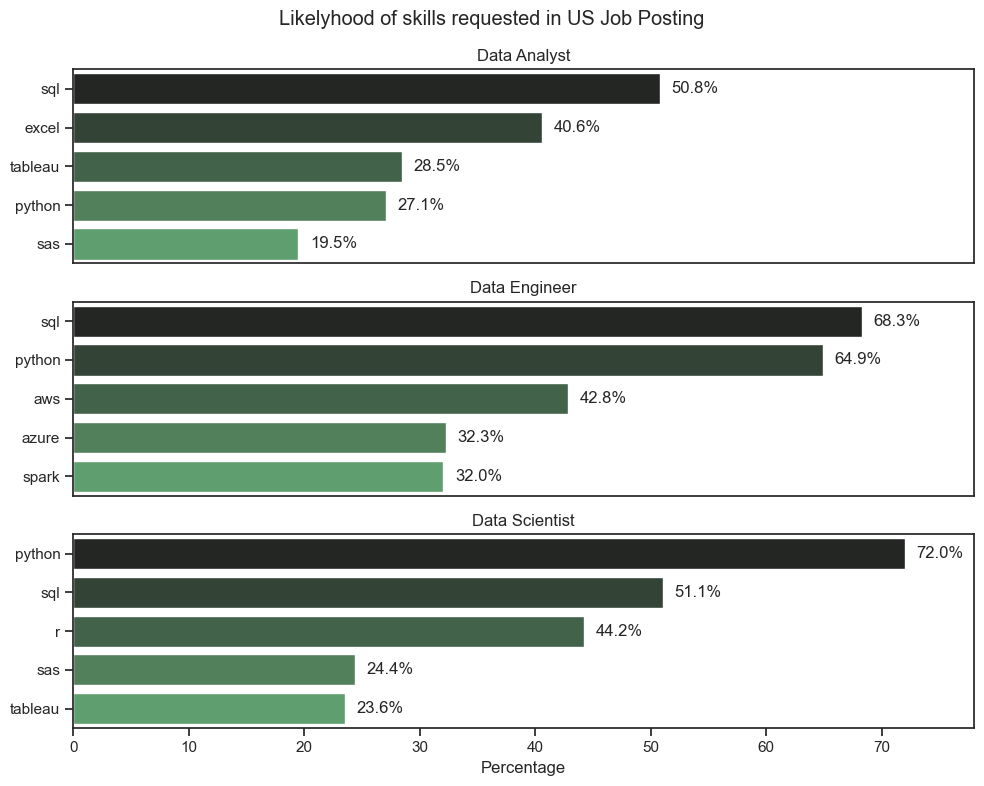

In [60]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 8))
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_perc[df_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='perc', y='job_skills', ax=ax[i], hue='job_skills', palette='dark:g')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    if i != len(job_titles)-1:
        ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)
    
    for n, v in enumerate(df_plot['perc']):
        ax[i].text(v +1, n, f'{v:0.1f}%', va='center')
    if i != len(job_titles)-1:
        ax[i].set_xticks([])
ax[len(job_titles)-1].set_xlabel('Percentage')
fig.suptitle('Likelyhood of skills requested in US Job Posting')
fig.tight_layout()